<a href="https://colab.research.google.com/github/dinhtiendat2k3/bai-tap/blob/main/Bu%E1%BB%95i_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pandas geopandas

In [12]:
import geopandas as gpd
import pandas as pd

In [13]:
diaphantinh = gpd.read_file('/content/diaphantinh.geojson')
mat_do_dan_so = pd.read_csv('/content/mat-do-dan-so.csv')

In [14]:
print("Thông tin về dữ liệu diaphantinh.geojson:")
print(diaphantinh.info())

print("\nThông tin về dữ liệu mat-do-dan-so.csv:")
print(mat_do_dan_so.info())

Thông tin về dữ liệu diaphantinh.geojson:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       63 non-null     int64   
 1   code      63 non-null     object  
 2   ten_tinh  63 non-null     object  
 3   geometry  63 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.1+ KB
None

Thông tin về dữ liệu mat-do-dan-so.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  70 non-null     object 
 1   density   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None


<ipython-input-17-b31cba45c302>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mat_do_dan_so['province'], mat_do_dan_so['density'], markerfmt='ro', linefmt='r-', basefmt='k-', use_line_collection=True)


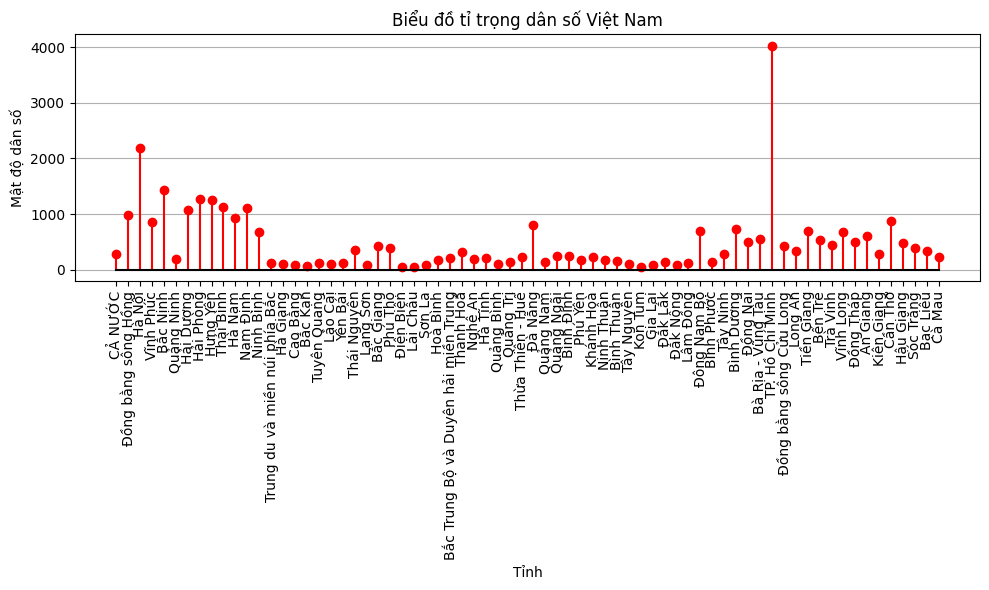

In [17]:
# Tạo lolipop figure
plt.figure(figsize=(10,6))
plt.stem(mat_do_dan_so['province'], mat_do_dan_so['density'], markerfmt='ro', linefmt='r-', basefmt='k-', use_line_collection=True)
plt.title('Biểu đồ tỉ trọng dân số Việt Nam')
plt.xlabel('Tỉnh')
plt.ylabel('Mật độ dân số')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Biểu đồ  lolipop figure thể hiện mật độ dân số của các tỉnh thành tại Việt Nam với trục x là tên các tỉnh và trục y là mật độ dân số.
Qua biểu đồ ta có thể thấy dân cư tập trung đông đúc nhất tại các tỉnh thành phố lớn như Hồ Chí Minh, Hà Nội, Hải Phòng, Bắc Ninh, Hưng Yên....
Dân cư phân bố thưa thớt chủ yếu tại các tỉnh miền núi như : Hà Giang, Cao Bằng, Bắc Kan, Điện Biên, Lai Châu....

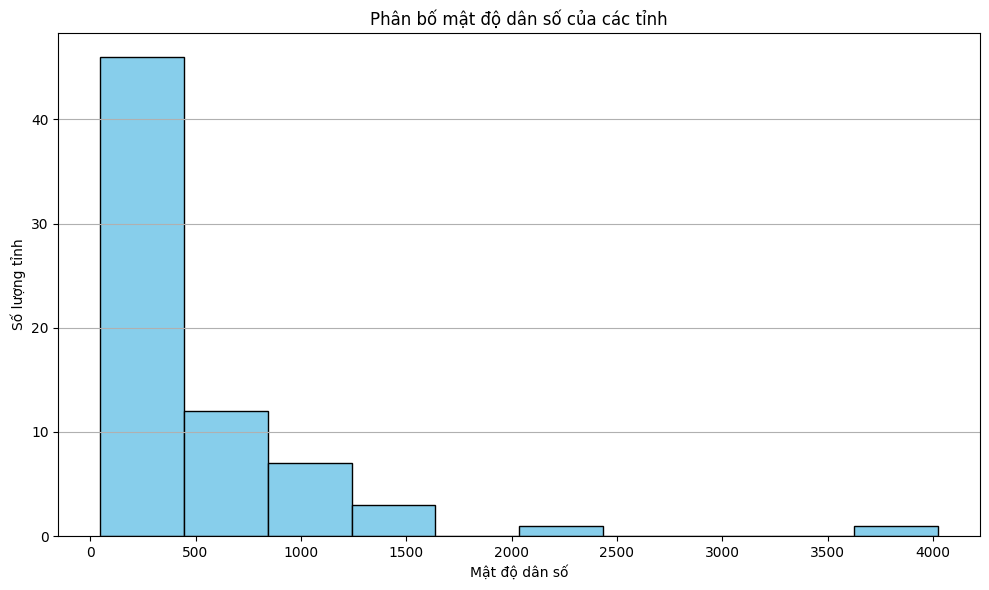

In [22]:
# Tạo histogram
plt.figure(figsize=(10,6))
plt.hist(mat_do_dan_so['density'], bins=10, color='skyblue', edgecolor='black')
plt.title('Phân bố mật độ dân số của các tỉnh')
plt.xlabel('Mật độ dân số')
plt.ylabel('Số lượng tỉnh')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Biểu đồ histogram thể hiện phân bố mật độ dân số của các tỉnh bằng cách chia mật độ dân số thành các khoảng và đếm số lượng tỉnh trong mỗi khoảng. Cho ta thấy sự phân bố về mật độ là không đều. Hầu hết các tỉnh đều có mật độ trên 500 người / km2 và chỉ có 1 số ít tỉnh thính có mật độ dân số từ 3000 người / km2 trở lên

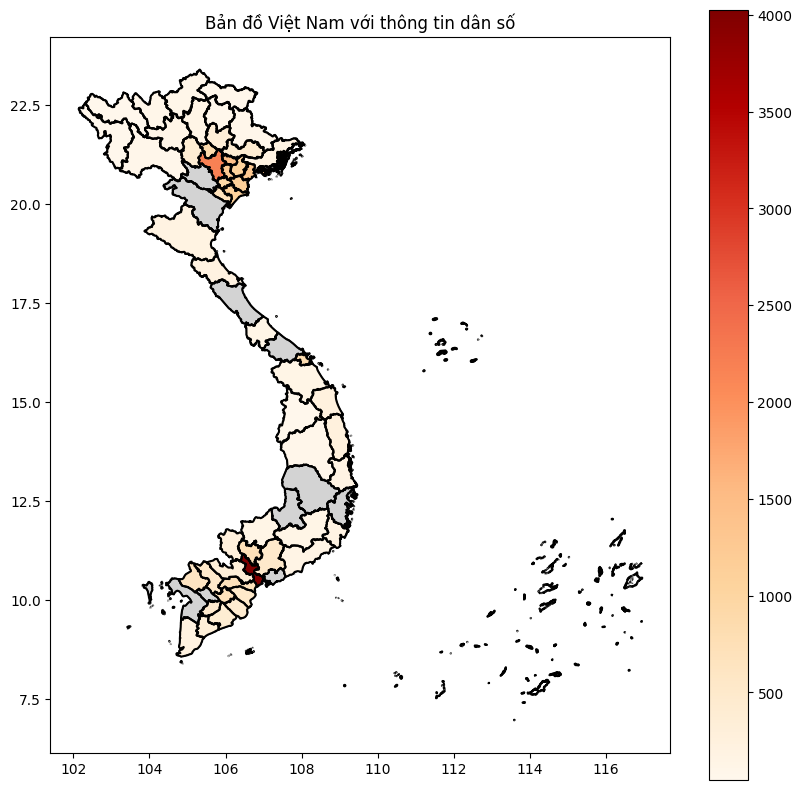

In [24]:
# Tạo bản đồ
fig, ax = plt.subplots(figsize=(10,10))
diaphantinh.plot(ax=ax, color='lightgrey', edgecolor='black')
diaphantinh.boundary.plot(ax=ax, color='black')
ax.set_title('Bản đồ Việt Nam với thông tin dân số')
dan_so_merged = diaphantinh.merge(mat_do_dan_so, left_on='ten_tinh', right_on='province', how='inner')
dan_so_merged.plot(column='density', cmap='OrRd', legend=True, ax=ax)
plt.show()

Bản đồ thể hiện mật độ dân số của các tỉnh bằng cách sử dụng màu sắc khác nhau cho mỗi tỉnh. Mật độ dân số cao được biểu thị bằng màu đỏ,  mật độ dân số thấp được biểu thị bằng màu vàng.
nó cho thấy rằng mật độ dân số của các tỉnh Việt Nam phân bố không đồng đều, dân cư tập trung chủ yếu tại các vùng đồng bằng ven biển và thưa thớt tại các tỉnh miền núi